In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load Dataset

In [82]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_labels=pd.read_csv('gender_submission.csv')

In [83]:
print(df_train.shape)
print(df_test.shape)
print(df_labels.shape)

(891, 12)
(418, 11)
(418, 2)


# Merge test data with survival labels

In [84]:
test_with_labels = pd.merge(df_test, df_labels, on="PassengerId", how="left")
test_with_labels.shape

(418, 12)

# Combine train and test into one DataFrame

In [85]:
df=pd.concat([df_train,test_with_labels])
df.shape

(1309, 12)

In [86]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [87]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [89]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Drop Cabin due to high missing values

In [90]:
df.drop(columns=['Cabin'], inplace=True)

# Fill Age with median

In [91]:
df['Age'] = df['Age'].fillna(df['Age'].median())


# Fill fare with median

In [92]:
df['Fare']=df['Fare'].fillna(df['Fare'].median())

# Fill Embarked with most common value

In [93]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [94]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Survival Count

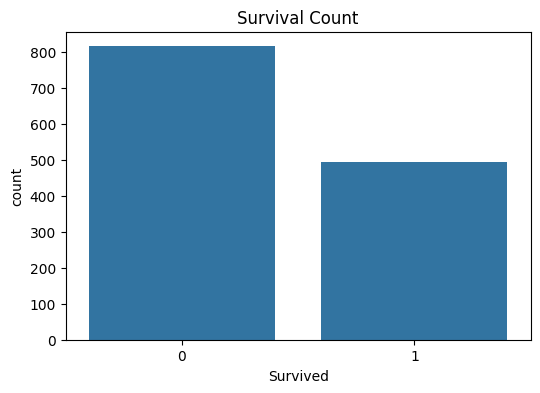

In [95]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()


Out of all passengers, around 38% survived while the majority 62% did not. This shows that survival was less likely.

# Gender Distribution

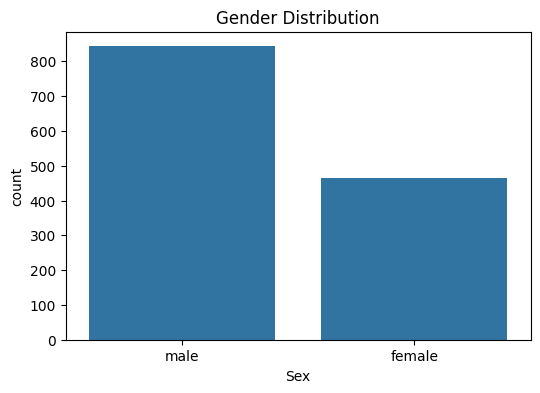

In [96]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", data=df)
plt.title("Gender Distribution")
plt.show()

There were more male passengers than female passengers on board the Titanic.

# Age Distribution

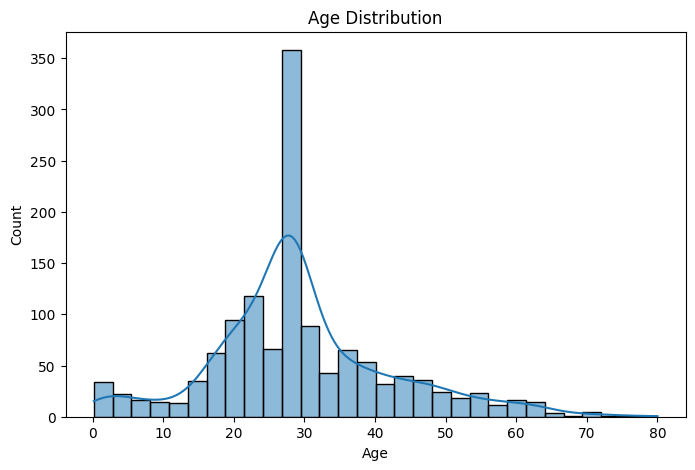

In [97]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

The most passenger Age between 20–40 years.

# Survival by Sex

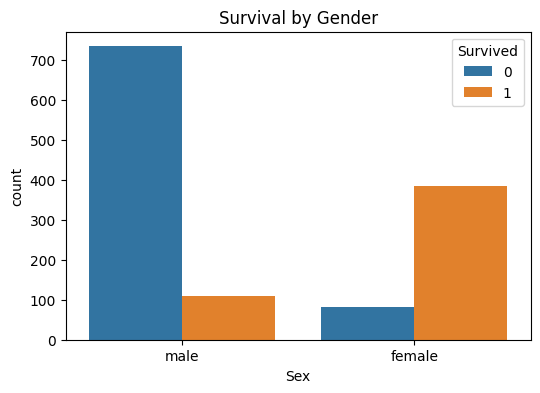

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()

Females had a much higher survival rate as compared to males.

# Survival by Passenger Class

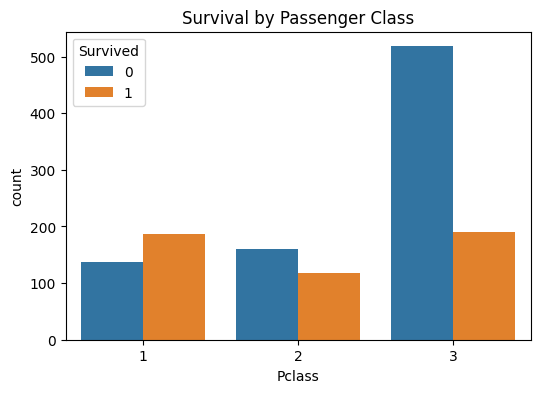

In [99]:
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

First class passengers had the highest survival rate as compare to second class and third-class passengers.

# Correlation Heatmap

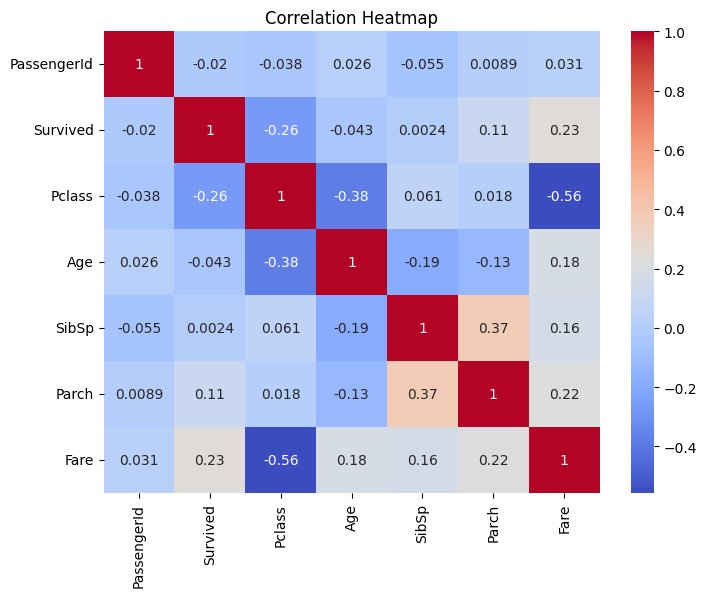

In [100]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Survived is positively correlated with Fare (0.26) and negatively correlated with Pclass (-0.34). Gender also has a strong negative correlation (-0.54, meaning females are more likely to survive).

# Pairplot


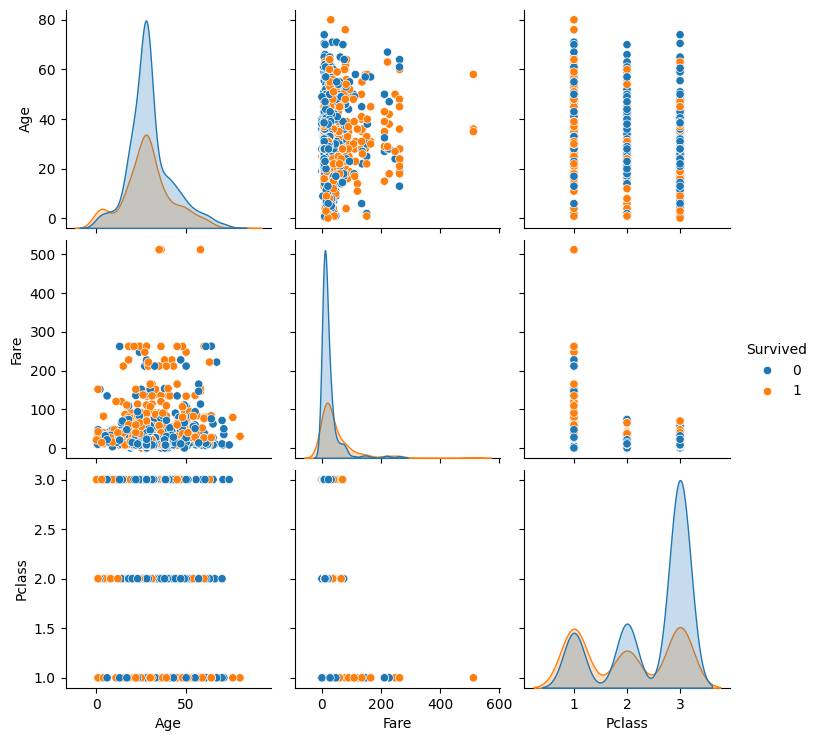

In [101]:
sns.pairplot(df[["Survived", "Age", "Fare", "Pclass"]], hue="Survived")
plt.show()

# Detect Outliers

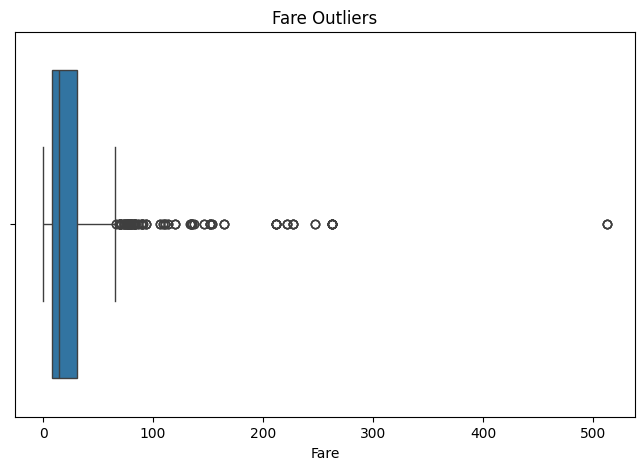

In [102]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Fare"])
plt.title("Fare Outliers")
plt.show()

# Survival Rate by gender

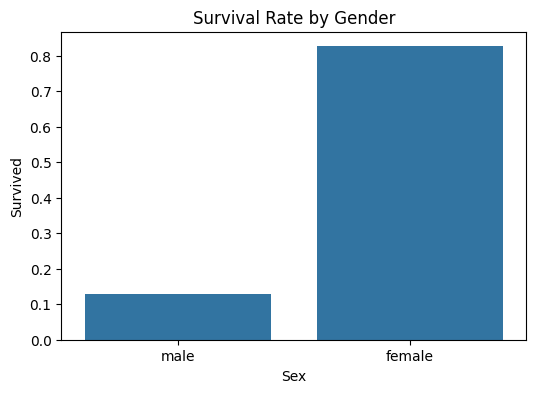

In [103]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title("Survival Rate by Gender")
plt.show()


- Females: ~82% survival rate.
- Males: ~13% survival rate.

# Survival Rate by Passenger Class

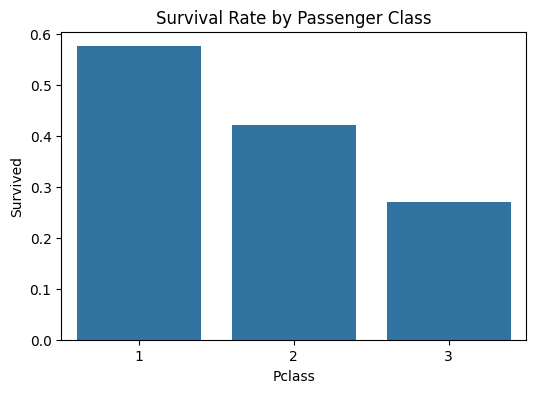

In [104]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.show()


- 1st Class: ~58% survival rate.
- 2nd Class: ~42% survival rate.
- 3rd Class: ~25% survival rate.

# Summary Observations
- Most passengers did not survive (~62%).
- Females had much higher survival rates than males.
- Higher-class passengers (Pclass 1) had better survival chances.
- Younger passengers had slightly higher survival probability.
- Fare and class are strongly related (higher fare → higher class).
- Age distribution peaks in the 20–40 range
- Survival rate was low overall (~38%).
